In [46]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
cnx = sqlite3.connect('C:/Users/Sridhar Reddy/DSCourse/MachineLearning-4/soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
df.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [7]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [8]:
df.shape


(183978, 42)

In [9]:
df.isnull().any().any(), df.shape


(True, (183978, 42))

In [10]:
df.isnull().sum(axis=0)


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [11]:
df = df.dropna()


In [12]:
df.shape

(180354, 42)

In [13]:
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [43]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [22]:
df = df.reindex(np.random.permutation(df.index))
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
67682,67683,49613,27598,2013-12-13 00:00:00,66.0,66.0,right,medium,medium,51.0,...,68.0,66.0,56.0,64.0,48.0,5.0,12.0,14.0,6.0,15.0
183566,183567,158293,19696,2010-02-22 00:00:00,70.0,70.0,right,high,high,70.0,...,78.0,69.0,69.0,67.0,60.0,14.0,20.0,66.0,20.0,20.0
120879,120880,192370,113631,2012-08-31 00:00:00,70.0,81.0,right,medium,low,63.0,...,67.0,66.0,33.0,34.0,39.0,13.0,13.0,8.0,12.0,13.0
17553,17554,34079,38834,2015-10-09 00:00:00,72.0,72.0,left,high,medium,67.0,...,49.0,58.0,70.0,72.0,76.0,14.0,7.0,14.0,6.0,6.0
21795,21796,183228,47553,2015-05-08 00:00:00,67.0,67.0,right,medium,medium,45.0,...,48.0,52.0,68.0,65.0,63.0,15.0,11.0,5.0,5.0,15.0


In [23]:
df = df.reindex(np.random.permutation(df.index))
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
107876,107877,219740,481722,2015-03-27 00:00:00,64.0,73.0,right,medium,medium,55.0,...,55.0,68.0,24.0,28.0,25.0,6.0,8.0,15.0,14.0,6.0
107901,107902,191687,150041,2014-02-07 00:00:00,78.0,82.0,right,medium,medium,47.0,...,54.0,42.0,79.0,81.0,76.0,14.0,10.0,13.0,9.0,5.0
147466,147467,192560,200515,2014-01-31 00:00:00,64.0,75.0,right,medium,medium,56.0,...,63.0,59.0,55.0,62.0,57.0,14.0,15.0,14.0,15.0,8.0
43571,43572,185204,106175,2010-02-22 00:00:00,71.0,73.0,left,medium,medium,39.0,...,56.0,61.0,70.0,71.0,68.0,5.0,21.0,51.0,21.0,21.0
148113,148114,108061,32597,2009-02-22 00:00:00,73.0,78.0,left,medium,medium,73.0,...,70.0,69.0,60.0,61.0,75.0,12.0,21.0,69.0,21.0,21.0


In [24]:
df[:10][['penalties', 'overall_rating']]


,penalties,overall_rating
107876,68.0,64.0
107901,42.0,78.0
147466,59.0,64.0
43571,61.0,71.0
148113,69.0,73.0
144538,51.0,64.0
89181,58.0,66.0
157085,12.0,61.0
87847,22.0,70.0
125189,61.0,77.0


In [25]:
df['overall_rating'].corr(df['penalties'])


0.39271510791118447

In [26]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [27]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" %(f, related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [28]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [29]:

correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [30]:
len(cols), len(correlations)


(34, 34)

In [31]:

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [32]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 


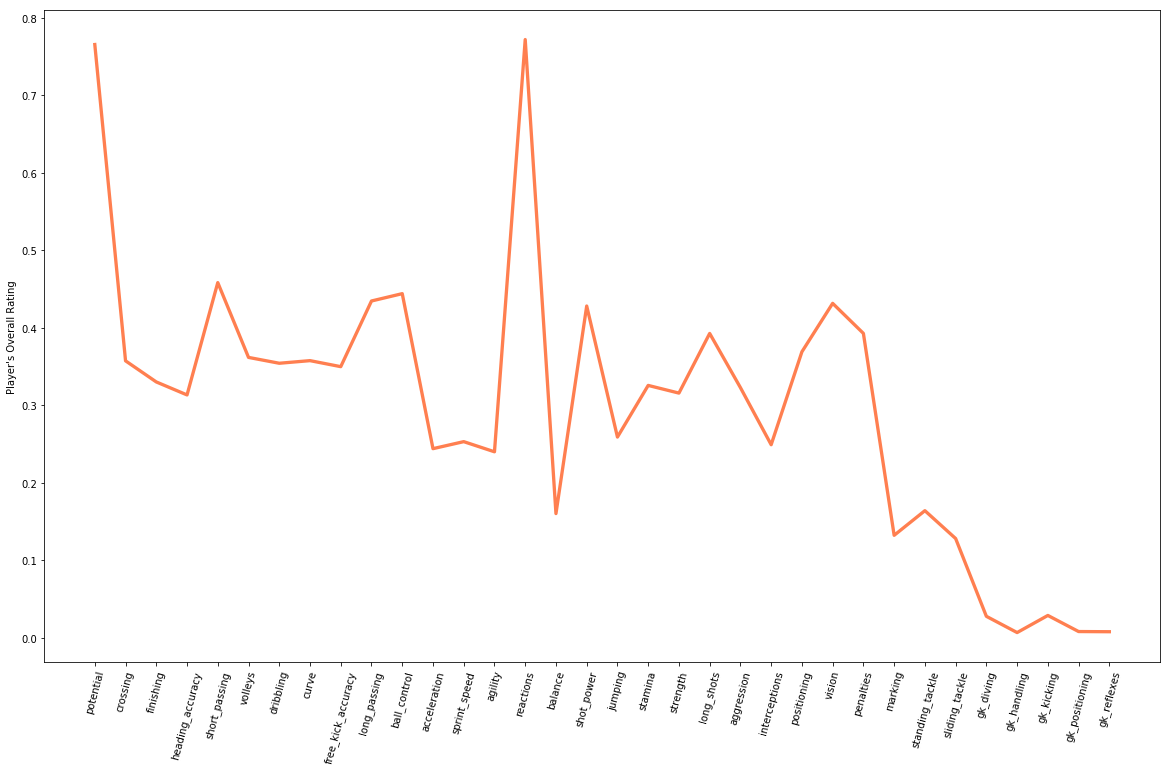

In [36]:
plot_dataframe(df2, 'Player\'s Overall Rating')


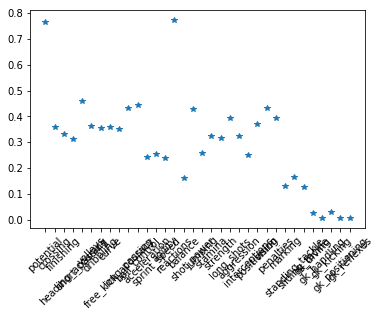

In [37]:
import pylab as pl
x = range(34)
xTicks = cols
y = correlations
pl.xticks(x, xTicks)
pl.xticks(range(34), xTicks, rotation=45) #writes strings with 45 degree angle
pl.plot(x,y,'*')
pl.show()

In [38]:
df2.index = df2['attributes']


In [39]:
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [40]:
df_select = df[select5features].copy(deep=True)


In [41]:
df_select.head()


,gk_kicking,potential,marking,interceptions,standing_tackle
107876,15.0,73.0,24.0,27.0,28.0
107901,13.0,82.0,79.0,77.0,81.0
147466,14.0,75.0,55.0,62.0,62.0
43571,51.0,73.0,70.0,63.0,71.0
148113,69.0,78.0,60.0,72.0,61.0


In [47]:
data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [48]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    55903
1    50476
2    23777
3    50198
dtype: int64

In [49]:
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.477101,0.105743,-0.947630,-0.975204,-0.914202,0
1,-0.040354,0.704438,1.027859,0.982540,1.030286,1
2,1.920631,0.037763,-1.111727,-0.653150,-1.200879,2
3,-0.337576,-0.843447,0.548304,0.407449,0.550859,3


E:\ancnda\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


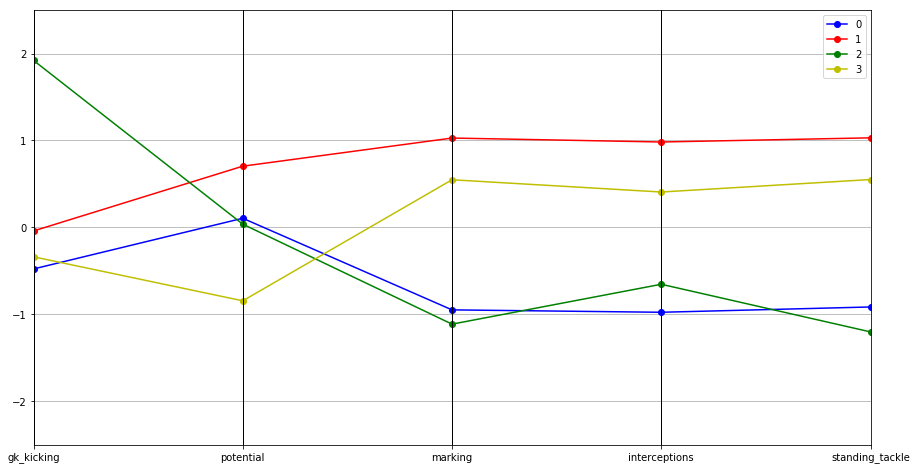

In [50]:
parallel_plot(P)
